In [162]:
# import pymisca.ext as pyext

from pymisca.iterative.base import getTraj
import pymisca.numpy_extra as pynp

import numpy as np
import pymisca.oop as pyop

from pymisca.ext import entropise
pynp.entropise = entropise


def entropise_weight(
    Y,X0=None,
    eps=1E-10,
    **kwargs
):
    '''
    Author: Feng Geng
    X: numpy.ndarray (i,j)
    Y: numpy.ndarray (i,k)
    S0: numpy.ndarray (j,k)
    
    Minimise the hellinger distance between Y and X \cdot S
    non-negative matrices x_{ij}, y_{ik}, s_{jk} with constraints
    \sum_j x_{ij} = 1
    \sum_k y_{ik} = 1
    \sum_k s_{jk} = 1 
    minimise  E = - \sum_{i,k} \sqrt{ \sum_j x_{ij} y_{ik} s_{jk} } 
    by iteratively setting 
    \sqrt{ s_{jk} } = d E / d \sqrt{ s_{jk} }
    in a normalised fashion
    '''
#     dx,dy = S.shape
#     N,dy = Y.shape
#     size = (N,dx)
    Y = np.array(Y)
    Y = pynp.arr__rowNorm(Y)

    size = Y.shape
    
    #### re-alias
#     X0 
#     S_ = S
    
    
    def step(X):
        '''
        Core iterative update
        '''
#         R = np.sqrt(S)
#         print X.shape
        gamma = np.sqrt(X)
        A = gamma * 2 * np.log(gamma) + gamma + 1
        grad = Y * A
#         print grad.shape
#         C = X.dot(S_)
#         A = np.sqrt(Y/(C + eps) )
#         grad = A.dot(S_.T) * np.sqrt(X)
        X = pynp.arr__rowNorm(grad**2)
        return X
    
    def lossFunc(S):
#         S = S**2
        x = pynp.entropise(S,axis=1)
        H = x.sum(axis=1,keepdims=1)
        ll =  -H + np.log(S)
        ll = ll * Y
        ll = ll.mean()
#         print ll
        return ll
    
#     def lossFunc(S):
#         ll = pynp.distance__hellinger(Y, S.dot(S_))
#         return  ll
    # dx,dy=size
    if X0 is None:
        X0 = np.random.random(size=size)
#         S0 = randMat(N=dx,d=dy)
    X0 = pynp.arr__rowNorm(X0)
        
    res = getTraj(step,
                  X0,
                  lossFunc=lossFunc,
                  **kwargs)
    return res
main = entropise_weight

In [36]:
res.last

array([[0.01113361, 0.00251673, 0.98634966]])

[[0.00217391 0.02391304 0.04565217 0.0673913  0.08913043 0.11086957
  0.1326087  0.15434783 0.17608696 0.19782609]]
[STOP]Failed to converge
[[3.08343951e-05 2.36442323e-03 6.80991330e-03 1.27035387e-02
  1.99655650e-02 2.87721466e-02 3.95451132e-02 5.30920775e-02
  7.10364111e-02 7.65679977e-01]]


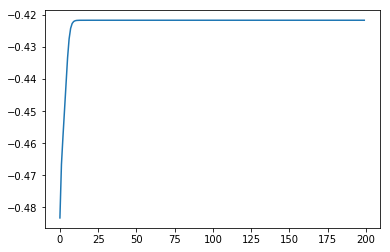

In [159]:
# Y = [[1, 0.4, 3., 0.7]]
# Y = np.random.random((1,9))
Y = [np.arange(10)+0.1]
Y = np.array(Y)
Y = pynp.arr__rowNorm(Y)
print Y
res = main(Y,speedTol=0.)

plt.plot(res.hist['loss'],)

print res.last

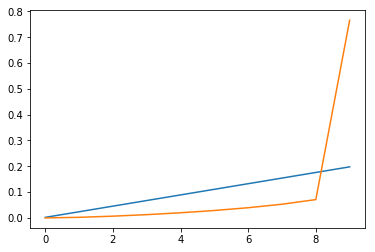

In [160]:
plt.figure()
plt.plot(Y.ravel())
plt.plot(res.last.ravel())

In [18]:
import pymisca.vis_util as pyvis
plt = pyvis.plt


In [161]:
??pyext.entropise